# 导入模块

In [1]:
import gym
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Q-learning

## Q-learning 算法

In [2]:
class agent_q_learning():
  def __init__(self, env, q_param):
    self.env = env
    if q_param is None:
      self.alpha = 0.5 
      self.gamma = 0.9
    else:
      self.alpha = q_param['alpha']
      self.gamma =  q_param['gamma']
    self.epsilon = 0.1

    self.q={}
    self.__init_q_table()
    pass

  def output_action(self, state, is_greedy = True):
    if random.uniform(0,1) < self.epsilon and is_greedy:
      return self.env.action_space.sample()
    else:
      return max(list(range(self.env.action_space.n)) ,
                 key=lambda x: self.q[(state,x)])
    pass

  def __init_q_table(self):
    for s in range(self.env.observation_space.n):
      for a in range(self.env.action_space.n):
        self.q[(s,a)]=0.0

  def update_q_table(self, state, action, next_state, next_maxaction, reward):
    self.q[(state,action)] += self.alpha * \
                            (reward + \
                             self.gamma * self.q[(next_state,next_maxaction)] - \
                             self.q[(state,action)] \
                             )


## Q-learning 执行和评估类

In [3]:
class evaluate_alg_q():
  def __init__(self, env, cnt=50, episodes=2000, q_param=None):
    #cnt 用作多次求平均值
    self.env = env
    self.cnt = cnt
    self.episodes = episodes
    self.q_param = q_param

    self.reward_array = np.zeros(episodes)
    
    pass

  def start_execute(self):
    for _ in tqdm(range(self.cnt)):
      self.agent = agent_q_learning(self.env, self.q_param)
      for i in range(self.episodes):
        r = 0
        state = self.env.reset()
        while True:
          action = self.agent.output_action(state)

          next_state, reward, done , _ = self.env.step(action)

          next_maxaction = self.agent.output_action(state, is_greedy=False)

          self.agent.update_q_table(state, action, next_state, next_maxaction, reward)

          state = next_state
          r += reward

          if done:
              break
        self.reward_array[i] += r
      self.reward_array[i] /= self.cnt

  def evaluate_plot_reward(self):
    plt.plot(self.reward_array,'-')
  
  def evaluate_plot_reward_dev(self, dev_num=10,style='-'):
    size_row = int(len(self.reward_array)/dev_num)
    reward_array_dev = self.reward_array.reshape((size_row, dev_num)).mean(axis = 1)
    envaluate_plt = plt.plot(reward_array_dev, style)
    return envaluate_plt

## Q-learning 创建实例和运行

In [4]:
env=gym.make('Taxi-v3')
algorithm_q = evaluate_alg_q(env, cnt=5, episodes=2000)
algorithm_q.start_execute()
# algorithm_q.evaluate_plot_reward()
env.close()

100%|██████████| 5/5 [00:24<00:00,  4.94s/it]


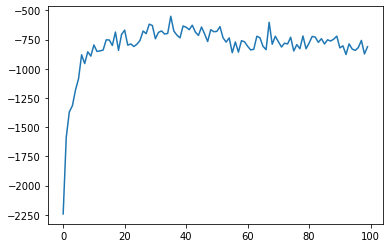

In [5]:
algorithm_q.evaluate_plot_reward_dev(dev_num=20)

# Sarsa

## Sarsa 算法

In [ ]:
class agent_sarsa():
  def __init__(self, env, sarsa_param):
    self.env = env
    if sarsa_param is None:
      self.alpha = 0.5 
      self.gamma = 0.9
    else:
      self.alpha = sarsa_param['alpha']
      self.gamma =  sarsa_param['gamma']

    self.epsilon = 0.1
    self.q = {}
    self.__q_table_init()
    pass

  def output_action(self, state):
    random_value = np.random.random()
    if random_value < self.epsilon:
      return env.action_space.sample()
    else:
      action_list = list(range(self.env.action_space.n))
      return max(action_list, key = lambda x: self.q[(state, x)])
    pass

  def update_q_table(self,state, action, next_state, next_action, reward):
    self.q[(state,action)] += self.alpha*(reward+self.gamma*self.q[(next_state,next_action)]-self.q[(state,action)])

  def __q_table_init(self):
    for s in range(self.env.observation_space.n):
      for a in range(self.env.action_space.n):
        self.q[(s,a)] = 0.0


## Sarsa 执行和评估类

In [ ]:
class evaluate_alg_sarsa():
  def __init__(self, env, cnt=50, episodes=2000, sarsa_param=None):
    #cnt 用作多次求平均值
    self.env = env
    self.cnt = cnt
    self.episodes = episodes
    self.sarsa_param = sarsa_param

    self.reward_array = np.zeros(episodes)
    pass

  def start_execute(self):
    for _ in tqdm(range(self.cnt)):
      self.agent = agent_sarsa(self.env, self.sarsa_param)
      for i in range(self.episodes):
        r = 0
        state = self.env.reset()
        action = self.agent.output_action(state)
        while True:
          next_state, reward, done , _ = self.env.step(action)
          next_action = self.agent.output_action(state)

          self.agent.update_q_table(state, action, next_state, next_action, reward)

          state = next_state
          action = next_action
          r += reward
          if done:
            break
        self.reward_array[i] += r
      self.reward_array[i] /= self.cnt

  def evaluate_plot_reward(self):
    plt.plot(self.reward_array)
  
  def evaluate_plot_reward_dev(self, dev_num=10, style='-.'):
    size_row = int(len(self.reward_array)/dev_num)
    reward_array_dev = self.reward_array.reshape((size_row, dev_num)).mean(axis = 1)
    envaluate_plt = plt.plot(reward_array_dev,style)
    return envaluate_plt

## Sarsa创建实例和运行

In [ ]:
env=gym.make('Taxi-v3')
algorithm_sarsa = evaluate_alg_sarsa(env, cnt=5, episodes=2000)
algorithm_sarsa.start_execute()
# algorithm_sarsa.evaluate_plot_reward()
env.close()


100%|██████████| 5/5 [00:25<00:00,  5.09s/it]


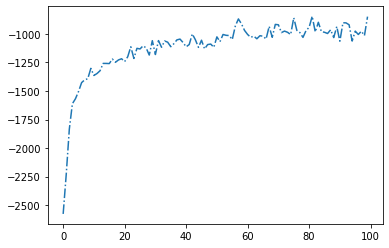

In [ ]:
algorithm_sarsa.evaluate_plot_reward_dev(20)

# 期望Sarsa

## 期望Sarsa算法

In [ ]:
class agent_sarsa_exp():
  def __init__(self, env, sarsa_param):
    self.env = env
    if sarsa_param is None:
      self.alpha = 0.5 
      self.gamma = 0.9
    else:
      self.alpha = sarsa_param['alpha']
      self.gamma =  sarsa_param['gamma']

    self.epsilon = 0.1
    self.q = {}
    self.__q_table_init()
    pass

  def output_action(self, state, isgreedy=True):
    random_value = np.random.random()
    if random_value < self.epsilon and isgreedy==True:
      return env.action_space.sample()
    else:
      action_list = list(range(self.env.action_space.n))
      return max(action_list, key = lambda x: self.q[(state, x)])
    pass

  def update_q_table(self,state, action, next_state, next_maxaction, reward):
    target_value = []
    for each_action in range(self.env.action_space.n):
      target_value.append(1/self.env.action_space.n * self.epsilon \
                          * self.q[(next_state, each_action)]) 
      if each_action == next_maxaction:
        target_value.append((1 - self.epsilon) * self.q[(next_state, each_action)])

    self.q[(state,action)] += self.alpha*(reward+self.gamma*(np.array(target_value)).sum()-self.q[(state,action)])

  def __q_table_init(self):
    for s in range(self.env.observation_space.n):
      for a in range(self.env.action_space.n):
        self.q[(s,a)] = 0.0


## 期望Sarsa执行和评估类

In [ ]:
class evaluate_alg_sarsa_exp():
  def __init__(self, env, cnt=50, episodes=2000, sarsa_exp_param=None):
    #cnt 用作多次求平均值
    self.env = env
    self.cnt = cnt
    self.episodes = episodes
    self.sarsa_exp_param = sarsa_exp_param

    self.reward_array = np.zeros(episodes)
    pass

  def start_execute(self):
    for _ in tqdm(range(self.cnt)):
      self.agent = agent_sarsa_exp(self.env, self.sarsa_exp_param)
      for i in range(self.episodes):
        r = 0
        state = self.env.reset()
        action = self.agent.output_action(state)
        while True:
          next_state, reward, done , _ = self.env.step(action)
          next_action = self.agent.output_action(state)
          next_maxaction = self.agent.output_action(state, isgreedy=False)

          self.agent.update_q_table(state, action, next_state, next_maxaction, reward)

          state = next_state
          action = next_action
          r += reward
          if done:
            break
        self.reward_array[i] += r
      self.reward_array[i] /= self.cnt

  def evaluate_plot_reward(self):
    plt.plot(self.reward_array,'--')
  
  def evaluate_plot_reward_dev(self, dev_num=10, style='--'):
    size_row = int(len(self.reward_array)/dev_num)
    reward_array_dev = self.reward_array.reshape((size_row, dev_num)).mean(axis = 1)
    envaluate_plt = plt.plot(reward_array_dev, style)
    return envaluate_plt

## 期望Sarsa创建实例和运行


100%|██████████| 5/5 [00:36<00:00,  7.26s/it]


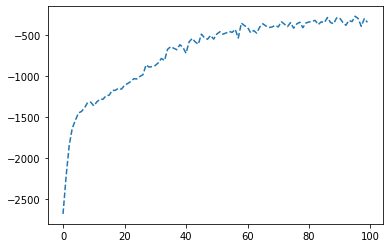

In [ ]:
env=gym.make('Taxi-v3')
algorithm_sarsa_exp = evaluate_alg_sarsa_exp(env, cnt=5, episodes=2000)
algorithm_sarsa_exp.start_execute()
# algorithm_sarsa.evaluate_plot_reward()
env.close()
algorithm_sarsa_exp.evaluate_plot_reward_dev(20)

# 双Q学习

## 双Q学习算法

In [ ]:
class agent_double_q_learning():
  def __init__(self, env, q_param):
    self.env = env
    if q_param is None:
      self.alpha = 0.5 
      self.gamma = 0.9
    else:
      self.alpha = q_param['alpha']
      self.gamma =  q_param['gamma']
    self.epsilon = 0.1

    self.q={}
    self.__init_q_table()
    pass

  def output_action(self, state, q1, q2=None, is_greedy = True):
    if random.uniform(0,1) < self.epsilon and is_greedy:
      return self.env.action_space.sample()
    elif q2 is not None:
      return max(list(range(self.env.action_space.n)) ,
                 key=lambda x: q1[(state,x)]+q2[(state,x)] )
    else:
      return max(list(range(self.env.action_space.n)) ,
                 key=lambda x: q1[(state,x)] )
    pass

  def __init_q_table(self):
    for s in range(self.env.observation_space.n):
      for a in range(self.env.action_space.n):
        self.q[(s,a)] = 0.0

  def update_q_table(self, state, action, next_state, next_maxaction, reward, q):
    self.q[(state,action)] += self.alpha * \
                            (reward + \
                             self.gamma * q[(next_state,next_maxaction)] - \
                             self.q[(state,action)] \
                             )


## 双Q学习执行和评估类

In [ ]:
class evaluate_alg_double_q():
  def __init__(self, env, cnt=50, episodes=2000, q_param=None):
    #cnt 用作多次求平均值
    self.env = env
    self.cnt = cnt
    self.episodes = episodes
    self.q_param = q_param
    self.reward_array = np.zeros(episodes)
    pass

  def start_execute(self):
    for _ in tqdm(range(self.cnt)):
      self.agent_q1 = agent_double_q_learning(self.env, self.q_param)
      self.agent_q2 = agent_double_q_learning(self.env, self.q_param)
      for i in range(self.episodes):
        r = 0
        state = self.env.reset()
        while True:
          action = self.agent_q1.output_action(state, self.agent_q1.q,\
                                            self.agent_q2.q)
          next_state, reward, done , _ = self.env.step(action)
          if np.random.random()< 0.5:
            next_maxaction = self.agent_q1.output_action(state,\
                                                         self.agent_q1.q,\
                                                         is_greedy=False)
            self.agent_q1.update_q_table(state, action, next_state,\
                                         next_maxaction, reward,\
                                         self.agent_q2.q)
          else:
            next_maxaction = self.agent_q2.output_action(state,\
                                              self.agent_q2.q,\
                                              is_greedy=False)
            self.agent_q2.update_q_table(state, action, next_state,\
                                         next_maxaction, reward,\
                                         self.agent_q1.q)
          state = next_state
          r += reward
          if done:
              break
        self.reward_array[i] += r
      self.reward_array[i] /= self.cnt

  def evaluate_plot_reward(self):
    plt.plot(self.reward_array,':')
  
  def evaluate_plot_reward_dev(self, dev_num=10,style=':'):
    size_row = int(len(self.reward_array)/dev_num)
    reward_array_dev = self.reward_array.reshape((size_row, dev_num)).mean(axis = 1)
    envaluate_plt = plt.plot(reward_array_dev, style)
    return envaluate_plt

## 创建实例和运行

In [ ]:
env=gym.make('Taxi-v3')
algorithm_double_q = evaluate_alg_double_q(env, cnt=5, episodes=2000)
algorithm_double_q.start_execute()
# algorithm_double_q.evaluate_plot_reward()
env.close()



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:06<00:27,  6.86s/it]

 40%|████      | 2/5 [00:13<00:20,  6.88s/it]

 60%|██████    | 3/5 [00:21<00:14,  7.05s/it]

 80%|████████  | 4/5 [00:28<00:07,  7.04s/it]

100%|██████████| 5/5 [00:34<00:00,  6.94s/it]


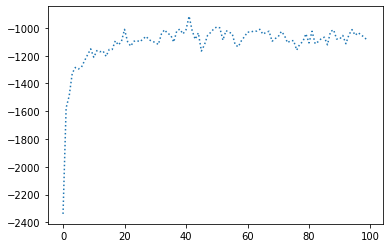

In [ ]:
algorithm_double_q.evaluate_plot_reward_dev(dev_num=20)

# 算法联合对比测试

Text(0, 0.5, 'average reward')

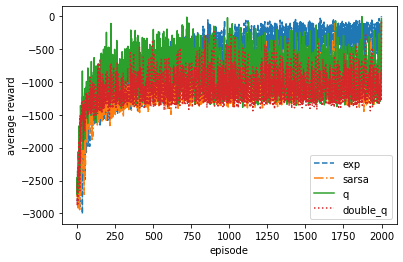

In [ ]:
algorithm_sarsa_exp.evaluate_plot_reward()
algorithm_sarsa.evaluate_plot_reward()
algorithm_q.evaluate_plot_reward()
algorithm_double_q.evaluate_plot_reward()
plt.legend(['exp','sarsa','q', 'double_q'])
plt.xlabel('episode')
plt.ylabel('average reward')

Text(0, 0.5, 'average reward')

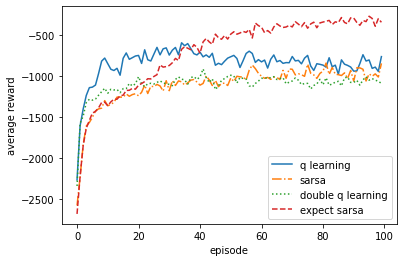

In [ ]:
algorithm_q.evaluate_plot_reward_dev(dev_num=20)
algorithm_sarsa.evaluate_plot_reward_dev(20)
algorithm_double_q.evaluate_plot_reward_dev(dev_num=20)
algorithm_sarsa_exp.evaluate_plot_reward_dev(20)
plt.legend(['q learning', 'sarsa','double q learning','expect sarsa'])
plt.xlabel('episode')
plt.ylabel('average reward')

# 工具和测试代码

## 效果对比

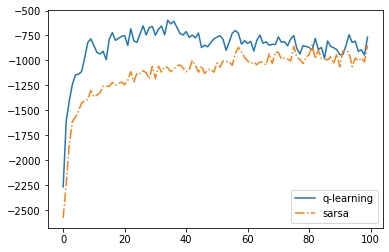

In [ ]:
algorithm_q.evaluate_plot_reward_dev(20)
algorithm_sarsa.evaluate_plot_reward_dev(20)
plt.legend(['q-learning', 'sarsa'])

In [ ]:
for i in range(5):
  print(algorithm_q.reward_array[i*400:(i+1)*400].mean())

-1046.7475
-709.49
-786.545
-828.395
-866.5063672000001


In [ ]:
for i in range(5):
  print(algorithm_sarsa.reward_array[i*400:(i+1)*400].mean())

-1478.4375
-1117.87
-1035.715
-987.2775
-961.5474976


In [ ]:
for i in range(5):
  print(algorithm_double_q.reward_array[i*400:(i+1)*400].mean())

-1285.6225
-1069.78
-1051.67
-1061.9625
-1066.6342448


In [ ]:
for i in range(5):
  print(algorithm_sarsa_exp.reward_array[i*400:(i+1)*400].mean())

-1461.9675
-862.51
-514.345
-398.0175
-335.3326432


In [ ]:
algorithm_sarsa.reward_array[:-500].mean()

-1167.6073333333334

## Sarsa粒子群算法，超参数选取

网址：https://zh.wikipedia.org/wiki/%E7%B2%92%E5%AD%90%E7%BE%A4%E4%BC%98%E5%8C%96

In [ ]:
class pso_evaluate():
  def __init__(self, pso_cnt, episode):
    #第0个存储全局信息
    self.pso_cnt = pso_cnt+1
    self.episode = episode
    self.pso_param_head = ['alpha', 'gamma']
    self.pso_param_limit = [(0.2, 1), (0.6, 1.2)]

    self.pso_agent = {}
    self.__pso_init_param()

  def pso_execute(self):
    for _ in range(self.episode):
      self.__pso_fitness_call1()
      self.__pso_fitness_call2()
      self.__pso_update_param()

  def pso_print_ans(self):
    print('ans is :',self.pso_agent[(0,'optim_param')])
    print('check it!')
    print('all msg:',self.pso_agent)

  def __pso_update_param(self):
    for i in range(self.pso_cnt-1):
      pso_v = np.array(list( self.pso_agent[(i+1, 'pso_v')].values() ))
      pso_optim_param = np.array(list( self.pso_agent[i+1, 'optim_param'].values() ))
      pso_now_param = np.array(list( self.pso_agent[i+1, 'now_param'].values() ))
      pso_best_param = np.array(list( self.pso_agent[0, 'optim_param'].values() ))

      pso_v = 0.5*pso_v + \
              2*np.random.random()*(pso_best_param - pso_now_param) + \
              2*np.random.random()*(pso_optim_param - pso_now_param)
      pso_now_param += pso_v

      self.pso_agent[(i+1, 'pso_v')] = { k:v for k,v in zip(self.pso_param_head, pso_v.tolist()) }
      self.pso_agent[(i+1,'now_param')] = { k:v for k,v in zip(self.pso_param_head, pso_now_param.tolist()) }
      self.__pso_modify_param(i+1)

  def __pso_modify_param(self, pso_agent_index):
    for i, title in enumerate(self.pso_param_head):
      if self.pso_agent[(pso_agent_index,'now_param')][title] < self.pso_param_limit[i][0]:
        self.pso_agent[(pso_agent_index,'now_param')][title] = self.pso_param_limit[i][0]
      if self.pso_agent[(pso_agent_index,'now_param')][title] > self.pso_param_limit[i][1]:
        self.pso_agent[(pso_agent_index,'now_param')][title] = self.pso_param_limit[i][1]

  def __pso_fitness_call1(self):
    fit_value_array = []
    for i in range(self.pso_cnt-1):
      fit_value = self.__fitness_evaluate(i+1)
      fit_value_array.append(fit_value)
      self.pso_agent[(i+1,'fit_value')]['fit_now'] = fit_value
      if fit_value > self.pso_agent[(i+1,'fit_value')]['fit_best']:
        self.pso_agent[(i+1,'fit_value')]['fit_best'] = fit_value
        self.pso_agent[(i+1, "optim_param")] = self.pso_agent[(i+1, 'now_param')]
    print(fit_value_array)
        
  def __fitness_evaluate(self,pso_agent_index):
    env=gym.make('Taxi-v3')
    sarsa_param = self.pso_agent[(pso_agent_index, 'now_param')]
    algorithm_sarsa = evaluate_alg_sarsa(env, cnt=1, episodes=2000, sarsa_param=sarsa_param)
    algorithm_sarsa.start_execute()
    env.close()
    fit_value = algorithm_sarsa.reward_array[:-500].mean()
    return fit_value
  
  def __pso_fitness_call2(self):
    for i in range(self.pso_cnt-1):
      if self.pso_agent[(i+1,'fit_value')]['fit_best'] > self.pso_agent[(0,'fit_value')]['fit_best']:
        self.pso_agent[(0,'fit_value')]['fit_best'] = self.pso_agent[(i+1,'fit_value')]['fit_best']
        self.pso_agent[(0, "optim_param")] = self.pso_agent[(i+1, 'now_param')]

  def __pso_init_param(self):
    for i in range(self.pso_cnt):
      self.pso_agent[(i,'optim_param')] = { k:v for k,v in zip(self.pso_param_head, np.zeros(len(self.pso_param_head)).tolist()) }
      self.pso_agent[(i,'now_param')] = { k:np.random.uniform(v[0],v[1]) \
                                         for k,v in zip(self.pso_param_head, self.pso_param_limit) }
      self.pso_agent[(i,'pso_v')] = { k:np.random.random()*(v[1]-v[0])*0.5
                                         for k,v in zip(self.pso_param_head, self.pso_param_limit) }
      self.pso_agent[(i,'fit_value')] = {'fit_best':float('-inf'), 'fit_now':float('-inf')}


## Sarsa粒子群算法执行

In [ ]:
pst_find  = pso_evaluate(pso_cnt=5, episode=20)
pst_find.pso_execute()
pst_find.pso_print_ans()

In [ ]:
pst_find.pso_print_ans()

ans is : {'alpha': 0.5317706294307902, 'gamma': 0.99545498514414}
check it!
all msg: {(0, 'optim_param'): {'alpha': 0.5317706294307902, 'gamma': 0.99545498514414}, (0, 'now_param'): {'alpha': 0.932028264229978, 'gamma': 0.6825262004636783}, (0, 'pso_v'): {'alpha': 0.34795721763395004, 'gamma': 0.036567065214874385}, (0, 'fit_value'): {'fit_best': -136.54866666666666, 'fit_now': -inf}, (1, 'optim_param'): {'alpha': 0.5218597412409309, 'gamma': 0.9904505342732186}, (1, 'now_param'): {'alpha': 0.5577608738523843, 'gamma': 0.9676947765826087}, (1, 'pso_v'): {'alpha': 0.045782997133948504, 'gamma': -0.03888587947393772}, (1, 'fit_value'): {'fit_best': -139.99133333333333, 'fit_now': -147.55866666666665}, (2, 'optim_param'): {'alpha': 0.5216973020841834, 'gamma': 0.9957539378477405}, (2, 'now_param'): {'alpha': 0.5158908171004695, 'gamma': 0.9965507427090402}, (2, 'pso_v'): {'alpha': 0.013174521249952841, 'gamma': -0.0009461567499910822}, (2, 'fit_value'): {'fit_best': -139.274, 'fit_now': -

In [ ]:
pst_find.pso_print_ans()

ans is : {'alpha': 0.5317706294307902, 'gamma': 0.99545498514414}
check it!
all msg: {(0, 'optim_param'): {'alpha': 0.5317706294307902, 'gamma': 0.99545498514414}, (0, 'now_param'): {'alpha': 0.932028264229978, 'gamma': 0.6825262004636783}, (0, 'pso_v'): {'alpha': 0.34795721763395004, 'gamma': 0.036567065214874385}, (0, 'fit_value'): {'fit_best': -136.54866666666666, 'fit_now': -inf}, (1, 'optim_param'): {'alpha': 0.5218597412409309, 'gamma': 0.9904505342732186}, (1, 'now_param'): {'alpha': 0.5577608738523843, 'gamma': 0.9676947765826087}, (1, 'pso_v'): {'alpha': 0.045782997133948504, 'gamma': -0.03888587947393772}, (1, 'fit_value'): {'fit_best': -139.99133333333333, 'fit_now': -147.55866666666665}, (2, 'optim_param'): {'alpha': 0.5216973020841834, 'gamma': 0.9957539378477405}, (2, 'now_param'): {'alpha': 0.5158908171004695, 'gamma': 0.9965507427090402}, (2, 'pso_v'): {'alpha': 0.013174521249952841, 'gamma': -0.0009461567499910822}, (2, 'fit_value'): {'fit_best': -139.274, 'fit_now': -

## Sarsa超参数效果测试

In [ ]:
env=gym.make('Taxi-v3')
sarsa_param = {'alpha': 0.5317706294307902, 'gamma': 0.99545498514414}
algorithm_sarsa1 = evaluate_alg_sarsa(env, cnt=5, episodes=2000, sarsa_param=sarsa_param)
algorithm_sarsa1.start_execute()
env.close()




  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:02<00:09,  2.48s/it]


 40%|████      | 2/5 [00:05<00:07,  2.52s/it]


 60%|██████    | 3/5 [00:07<00:04,  2.48s/it]


 80%|████████  | 4/5 [00:09<00:02,  2.49s/it]


100%|██████████| 5/5 [00:12<00:00,  2.47s/it]


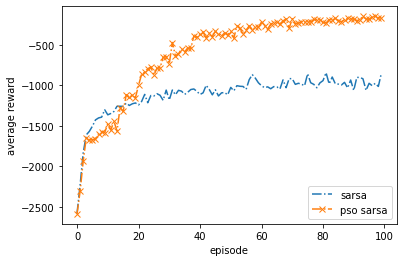

In [ ]:
algorithm_sarsa.evaluate_plot_reward_dev(20)
algorithm_sarsa1.evaluate_plot_reward_dev(20,style='x-.')
plt.xlabel('episode')
plt.ylabel('average reward')
plt.legend(['sarsa', 'pso sarsa'], loc='lower right')

## Q-learning粒子群算法参数选取

In [ ]:
class pso_evaluate_q(pso_evaluate):
  def __fitness_evaluate(self,pso_agent_index):
    env=gym.make('Taxi-v3')
    q_param = self.pso_agent[(pso_agent_index, 'now_param')]
    algorithm_q = evaluate_alg_q(env, cnt=1, episodes=2000, q_param=q_param)
    algorithm_q.start_execute()
    env.close()
    fit_value = algorithm_q.reward_array[:-500].mean()
    return fit_value


In [ ]:
pst_find = pso_evaluate_q(pso_cnt=5, episode=20)
pst_find.pso_execute()

In [ ]:
pst_find.pso_print_ans()

ans is : {'alpha': 0.5374978944586886, 'gamma': 1.0119420190638535}
check it!
all msg: {(0, 'optim_param'): {'alpha': 0.5374978944586886, 'gamma': 1.0119420190638535}, (0, 'now_param'): {'alpha': 0.3525777902097395, 'gamma': 1.1504084287030008}, (0, 'pso_v'): {'alpha': 0.1170468054406078, 'gamma': 0.11366650955111461}, (0, 'fit_value'): {'fit_best': -133.616, 'fit_now': -inf}, (1, 'optim_param'): {'alpha': 0.5577530724321791, 'gamma': 1.0057630967962152}, (1, 'now_param'): {'alpha': 0.5501945528879701, 'gamma': 1.0117147871147913}, (1, 'pso_v'): {'alpha': -0.024542717589038903, 'gamma': 0.008956335193081153}, (1, 'fit_value'): {'fit_best': -138.83933333333334, 'fit_now': -149.874}, (2, 'optim_param'): {'alpha': 0.29048242255912404, 'gamma': 0.980494823797647}, (2, 'now_param'): {'alpha': 0.2, 'gamma': 0.6}, (2, 'pso_v'): {'alpha': -0.1386098620542461, 'gamma': -0.12282719670330779}, (2, 'fit_value'): {'fit_best': -179.986, 'fit_now': -256.97}, (3, 'optim_param'): {'alpha': 0.5466544478

In [ ]:
pst_find.pso_print_ans()\

## Q-learning超参数效果测试

In [ ]:
env=gym.make('Taxi-v3')
q_param = {'alpha': 0.5374978944586886, 'gamma': 1.0119420190638535}
algorithm_q1 = evaluate_alg_q(env, cnt=5, episodes=2000, q_param=q_param)
algorithm_q1.start_execute()
env.close()

Text(0, 0.5, 'average reward')

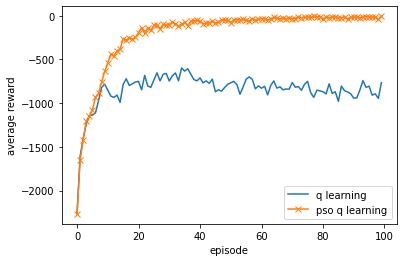

In [ ]:
algorithm_q.evaluate_plot_reward_dev(20)
algorithm_q1.evaluate_plot_reward_dev(20,style='x-')
plt.legend(['q learning', 'pso q learning'])
plt.xlabel('episode')
plt.ylabel('average reward')

## 期望Sarsa粒子群算法参数选取

In [ ]:
class pso_evaluate_sarsa_exp():
  def __init__(self, pso_cnt, episode):
    #第0个存储全局信息
    self.pso_cnt = pso_cnt+1
    self.episode = episode
    self.pso_param_head = ['alpha', 'gamma']
    self.pso_param_limit = [(0.2, 1), (0.6, 1.2)]

    self.pso_agent = {}
    self.__pso_init_param()

  def pso_execute(self):
    for _ in range(self.episode):
      self.__pso_fitness_call1()
      self.__pso_fitness_call2()
      self.__pso_update_param()

  def pso_print_ans(self):
    print('ans is :',self.pso_agent[(0,'optim_param')])
    print('check it!')
    print('all msg:',self.pso_agent)

  def __pso_update_param(self):
    for i in range(self.pso_cnt-1):
      pso_v = np.array(list( self.pso_agent[(i+1, 'pso_v')].values() ))
      pso_optim_param = np.array(list( self.pso_agent[i+1, 'optim_param'].values() ))
      pso_now_param = np.array(list( self.pso_agent[i+1, 'now_param'].values() ))
      pso_best_param = np.array(list( self.pso_agent[0, 'optim_param'].values() ))

      pso_v = 0.5*pso_v + \
              2*np.random.random()*(pso_best_param - pso_now_param) + \
              2*np.random.random()*(pso_optim_param - pso_now_param)
      pso_now_param += pso_v

      self.pso_agent[(i+1, 'pso_v')] = { k:v for k,v in zip(self.pso_param_head, pso_v.tolist()) }
      self.pso_agent[(i+1,'now_param')] = { k:v for k,v in zip(self.pso_param_head, pso_now_param.tolist()) }
      self.__pso_modify_param(i+1)

  def __pso_modify_param(self, pso_agent_index):
    for i, title in enumerate(self.pso_param_head):
      if self.pso_agent[(pso_agent_index,'now_param')][title] < self.pso_param_limit[i][0]:
        self.pso_agent[(pso_agent_index,'now_param')][title] = self.pso_param_limit[i][0]
      if self.pso_agent[(pso_agent_index,'now_param')][title] > self.pso_param_limit[i][1]:
        self.pso_agent[(pso_agent_index,'now_param')][title] = self.pso_param_limit[i][1]

  def __pso_fitness_call1(self):
    fit_value_array = []
    for i in range(self.pso_cnt-1):
      fit_value = self.__fitness_evaluate(i+1)
      fit_value_array.append(fit_value)
      self.pso_agent[(i+1,'fit_value')]['fit_now'] = fit_value
      if fit_value > self.pso_agent[(i+1,'fit_value')]['fit_best']:
        self.pso_agent[(i+1,'fit_value')]['fit_best'] = fit_value
        self.pso_agent[(i+1, "optim_param")] = self.pso_agent[(i+1, 'now_param')]
    print(fit_value_array)
        
  def __fitness_evaluate(self,pso_agent_index):
    env=gym.make('Taxi-v3')
    sarsa_exp_param = self.pso_agent[(pso_agent_index, 'now_param')]
    algorithm_sarsa = evaluate_alg_sarsa_exp(env, cnt=1, episodes=2000, sarsa_exp_param=sarsa_exp_param)
    algorithm_sarsa.start_execute()
    env.close()
    fit_value = algorithm_sarsa.reward_array[:-500].mean()
    return fit_value
  
  def __pso_fitness_call2(self):
    for i in range(self.pso_cnt-1):
      if self.pso_agent[(i+1,'fit_value')]['fit_best'] > self.pso_agent[(0,'fit_value')]['fit_best']:
        self.pso_agent[(0,'fit_value')]['fit_best'] = self.pso_agent[(i+1,'fit_value')]['fit_best']
        self.pso_agent[(0, "optim_param")] = self.pso_agent[(i+1, 'now_param')]

  def __pso_init_param(self):
    for i in range(self.pso_cnt):
      self.pso_agent[(i,'optim_param')] = { k:v for k,v in zip(self.pso_param_head, np.zeros(len(self.pso_param_head)).tolist()) }
      self.pso_agent[(i,'now_param')] = { k:np.random.uniform(v[0],v[1]) \
                                         for k,v in zip(self.pso_param_head, self.pso_param_limit) }
      self.pso_agent[(i,'pso_v')] = { k:np.random.random()*(v[1]-v[0])*0.5
                                         for k,v in zip(self.pso_param_head, self.pso_param_limit) }
      self.pso_agent[(i,'fit_value')] = {'fit_best':float('-inf'), 'fit_now':float('-inf')}


## 期望Sarsa粒子群算法执行

In [ ]:
pst_find  = pso_evaluate_sarsa_exp(pso_cnt=5, episode=20)
pst_find.pso_execute()
pst_find.pso_print_ans()



  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:12<00:00, 12.20s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:11<00:00, 11.69s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:09<00:00,  9.44s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.46s/it]


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


100%|██████████| 1/1 [00:07<00:00,  7.91s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-226.45933333333332, -219.354, -195.848, -119.06733333333334, -196.912]




100%|██████████| 1/1 [00:13<00:00, 13.86s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:12<00:00, 12.30s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.28s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.95s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-587.92, -516.316, -117.35466666666666, -121.07333333333334, -255.71066666666667]




100%|██████████| 1/1 [00:11<00:00, 11.47s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.97s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.19s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.40s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-225.04066666666668, -112.40266666666666, -117.74066666666667, -110.98533333333333, -181.972]




100%|██████████| 1/1 [00:12<00:00, 12.11s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.04s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.81s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.56s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:11<00:00, 11.45s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-237.892, -168.796, -163.76733333333334, -127.81666666666666, -226.898]




100%|██████████| 1/1 [00:13<00:00, 13.25s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.76s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.81s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:09<00:00,  9.72s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-944.1406666666667, -123.488, -108.65733333333333, -123.206, -189.35733333333334]




100%|██████████| 1/1 [00:12<00:00, 12.42s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.95s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.39s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.76s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:09<00:00,  9.10s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-225.96066666666667, -112.20533333333333, -128.53466666666668, -106.79133333333333, -244.07333333333332]




100%|██████████| 1/1 [00:04<00:00,  4.14s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.15s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.76s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.90s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-126.956, -110.284, -109.55933333333333, -110.12533333333333, -185.19933333333333]




100%|██████████| 1/1 [00:13<00:00, 13.69s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.23s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.15s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:11<00:00, 11.01s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-590.9766666666667, -110.886, -109.846, -109.012, -218.62866666666667]




100%|██████████| 1/1 [00:04<00:00,  4.44s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.62s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.83s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:10<00:00, 10.91s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-117.124, -112.584, -116.81533333333333, -116.15066666666667, -196.732]




100%|██████████| 1/1 [00:07<00:00,  7.15s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.83s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.91s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.45s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:12<00:00, 12.32s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-148.01333333333332, -122.28533333333333, -110.89866666666667, -111.67333333333333, -398.21733333333333]




100%|██████████| 1/1 [00:12<00:00, 12.82s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.37s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.74s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:09<00:00,  9.10s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-850.6, -121.17266666666667, -109.26266666666666, -108.73066666666666, -188.35133333333334]




100%|██████████| 1/1 [00:11<00:00, 11.75s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:07<00:00,  7.38s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.03s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-485.228, -164.69, -119.726, -104.10733333333333, -105.426]




100%|██████████| 1/1 [00:09<00:00,  9.78s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:07<00:00,  7.07s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.06s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-199.83466666666666, -114.33133333333333, -143.48133333333334, -117.65533333333333, -128.74933333333334]




100%|██████████| 1/1 [00:11<00:00, 11.39s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.27s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.14s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-489.8566666666667, -131.54733333333334, -105.44533333333334, -106.97333333333333, -124.576]




100%|██████████| 1/1 [00:04<00:00,  4.45s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.93s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.69s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.23s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-111.14, -107.69933333333333, -120.482, -110.04066666666667, -130.93266666666668]




100%|██████████| 1/1 [00:05<00:00,  5.18s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.43s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.92s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.75s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-135.794, -110.386, -143.75533333333334, -108.22933333333333, -124.998]




100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.28s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:07<00:00,  8.00s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.99s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-125.81533333333333, -107.1, -164.86733333333333, -107.06266666666667, -125.76866666666666]




100%|██████████| 1/1 [00:07<00:00,  7.05s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.31s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:09<00:00,  9.56s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.86s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-154.59666666666666, -146.47933333333333, -319.196, -107.81866666666667, -122.92733333333334]




100%|██████████| 1/1 [00:10<00:00, 10.52s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.00s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.25s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.07s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:10<00:00, 10.21s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

[-442.9413333333333, -105.482, -130.738, -112.85733333333333, -396.758]




100%|██████████| 1/1 [00:05<00:00,  5.52s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.63s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.36s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

[-130.60533333333333, -115.48133333333334, -140.346, -110.05266666666667, -123.83066666666667]
ans is : {'alpha': 0.8793776792728718, 'gamma': 0.9964040263575571}
check it!
all msg: {(0, 'optim_param'): {'alpha': 0.8793776792728718, 'gamma': 0.9964040263575571}, (0, 'now_param'): {'alpha': 0.9141648937895781, 'gamma': 1.0668299079894774}, (0, 'pso_v'): {'alpha': 0.018438383634627842, 'gamma': 0.12769346682082328}, (0, 'fit_value'): {'fit_best': -104.10733333333333, 'fit_now': -inf}, (1, 'optim_param'): {'alpha': 0.980848329531363, 'gamma': 0.9917464469812499}, (1, 'now_param'): {'alpha': 0.8749509003091737, 'gamma': 1.0278338623225507}, (1, 'pso_v'): {'alpha': -0.12504909969082634, 'gamma': 0.08976050751758605}, (1, 'fit_value'): {'fit_best': -111.14, 'fit_now': -130.60533333333333}, (2, 'optim_param'): {'alpha': 0.8900559903062312, 'gamma': 0.988654229746266}, (2, 'now_param'): {'alpha': 0.8987468052436668, 'gamma': 0.9823864768713678}, (2, 'pso_v'): {'alpha': 0.05142847068685597, 'ga

## 期望Sarsa粒子群算法测试

In [ ]:
env=gym.make('Taxi-v3')
sarsa_exp_param = {'alpha': 0.8793776792728718, 'gamma': 0.9964040263575571}
algorithm_sarsa_exp1 = evaluate_alg_sarsa_exp(env, cnt=5, episodes=2000, sarsa_exp_param=sarsa_exp_param)
algorithm_sarsa_exp1.start_execute()
env.close()




  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:04<00:16,  4.05s/it]


 40%|████      | 2/5 [00:07<00:11,  4.00s/it]


 60%|██████    | 3/5 [00:11<00:07,  3.98s/it]


 80%|████████  | 4/5 [00:15<00:03,  3.90s/it]


100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


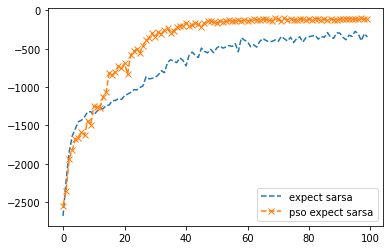

In [ ]:
algorithm_sarsa_exp.evaluate_plot_reward_dev(20)
algorithm_sarsa_exp1.evaluate_plot_reward_dev(20, style='x--')
plt.legend(['expect sarsa', 'pso expect sarsa'])

## Double Q-learning粒子群算法参数选取

In [ ]:
class pso_evaluate_double_q(pso_evaluate):
  def __fitness_evaluate(self,pso_agent_index):
    env=gym.make('Taxi-v3')
    q_param = self.pso_agent[(pso_agent_index, 'now_param')]
    algorithm_q = evaluate_alg_double_q(env, cnt=1, episodes=2000, q_param=q_param)
    algorithm_q.start_execute()
    env.close()
    fit_value = algorithm_q.reward_array[:-500].mean()
    return fit_value

In [ ]:
pst_find = pso_evaluate_double_q(pso_cnt=5, episode=20)
pst_find.pso_execute()




  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.74s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.52s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.65s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.17s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.67s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-258.74333333333334, -177.00133333333332, -255.608, -233.13666666666666, -209.21133333333333]





100%|██████████| 1/1 [00:05<00:00,  5.59s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:06<00:00,  6.23s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.26s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.08s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-575.2033333333334, -646.012, -469.2013333333333, -418.25666666666666, -158.06066666666666]





100%|██████████| 1/1 [00:05<00:00,  5.83s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.45s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.56s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.69s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.54s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-253.912, -193.822, -493.9406666666667, -253.116, -177.94266666666667]





100%|██████████| 1/1 [00:05<00:00,  5.73s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.42s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.82s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.49s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.87s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-258.97, -348.484, -254.60333333333332, -239.63933333333333, -231.37]





100%|██████████| 1/1 [00:04<00:00,  4.52s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.31s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.84s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.16s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-219.23333333333332, -328.3546666666667, -155.69466666666668, -182.20466666666667, -163.074]





100%|██████████| 1/1 [00:05<00:00,  5.66s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.03s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.13s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.80s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-513.4633333333334, -156.888, -467.41, -305.09933333333333, -195.62933333333334]





100%|██████████| 1/1 [00:06<00:00,  6.88s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.03s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.52s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-246.10933333333332, -143.79133333333334, -469.0013333333333, -363.2386666666667, -156.964]





100%|██████████| 1/1 [00:05<00:00,  5.49s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.40s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.72s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.31s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-247.50533333333334, -148.044, -254.73466666666667, -245.38333333333333, -147.354]





100%|██████████| 1/1 [00:05<00:00,  5.05s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.39s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.75s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.47s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.82s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-454.3346666666667, -162.47733333333332, -253.30933333333334, -280.106, -163.71333333333334]





100%|██████████| 1/1 [00:05<00:00,  5.94s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.78s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.17s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.10s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.61s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-258.272, -147.528, -405.9753333333333, -302.108, -158.544]





100%|██████████| 1/1 [00:04<00:00,  4.15s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.49s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.12s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.90s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.33s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-344.746, -154.37466666666666, -443.58133333333336, -166.74466666666666, -292.2153333333333]





100%|██████████| 1/1 [00:03<00:00,  3.77s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.84s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.19s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-189.34733333333332, -155.33666666666667, -215.88666666666666, -139.718, -148.094]





100%|██████████| 1/1 [00:05<00:00,  5.49s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.48s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.51s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.79s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-249.082, -147.34266666666667, -245.666, -152.98333333333332, -170.14666666666668]





100%|██████████| 1/1 [00:04<00:00,  4.01s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.54s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.88s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.13s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-188.398, -145.13933333333333, -348.65, -161.21066666666667, -176.71066666666667]





100%|██████████| 1/1 [00:02<00:00,  2.66s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.36s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.03s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.61s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-153.05533333333332, -157.648, -236.87733333333333, -154.374, -149.13266666666667]





100%|██████████| 1/1 [00:02<00:00,  2.43s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.34s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.76s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.92s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-159.382, -179.01133333333334, -250.31266666666667, -158.75866666666667, -159.53333333333333]





100%|██████████| 1/1 [00:02<00:00,  2.25s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.50s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.78s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.76s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.67s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-151.92666666666668, -179.15866666666668, -283.004, -158.29333333333332, -151.61]





100%|██████████| 1/1 [00:03<00:00,  3.22s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:04<00:00,  4.04s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.89s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.65s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-171.92266666666666, -190.59533333333334, -258.94933333333336, -145.088, -159.49066666666667]





100%|██████████| 1/1 [00:02<00:00,  2.32s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.37s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:05<00:00,  5.59s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

[-148.08666666666667, -182.91733333333335, -250.80466666666666, -148.276, -156.41333333333333]





100%|██████████| 1/1 [00:02<00:00,  2.55s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:02<00:00,  2.38s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.92s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.29s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

[-173.18733333333333, -148.896, -297.844, -194.19333333333333, -187.87466666666666]


In [ ]:
pst_find.pso_print_ans()

ans is : {'alpha': 0.5265945680168334, 'gamma': 0.9764647562876259}
check it!
all msg: {(0, 'optim_param'): {'alpha': 0.5265945680168334, 'gamma': 0.9764647562876259}, (0, 'now_param'): {'alpha': 0.24411686372907948, 'gamma': 0.7602072763302625}, (0, 'pso_v'): {'alpha': 0.0018224370695436587, 'gamma': 0.02477541979446779}, (0, 'fit_value'): {'fit_best': -139.718, 'fit_now': -inf}, (1, 'optim_param'): {'alpha': 0.47628483341833844, 'gamma': 1.0375691594658287}, (1, 'now_param'): {'alpha': 0.5506419794614362, 'gamma': 0.9471229141098948}, (1, 'pso_v'): {'alpha': 0.09114466739105162, 'gamma': -0.11096104610422401}, (1, 'fit_value'): {'fit_best': -148.08666666666667, 'fit_now': -173.18733333333333}, (2, 'optim_param'): {'alpha': 0.48264009672859315, 'gamma': 1.009945084715142}, (2, 'now_param'): {'alpha': 0.5406303833871949, 'gamma': 0.9657768180236795}, (2, 'pso_v'): {'alpha': 0.08350353925574072, 'gamma': -0.06323283573488978}, (2, 'fit_value'): {'fit_best': -143.79133333333334, 'fit_now

In [ ]:
env=gym.make('Taxi-v3')
q_param = {'alpha': 0.5265945680168334, 'gamma': 0.9764647562876259}
algorithm_double_q1 = evaluate_alg_double_q(env, cnt=5, episodes=2000, q_param=q_param)
algorithm_double_q1.start_execute()
env.close()




  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:04<00:19,  4.75s/it]


 40%|████      | 2/5 [00:10<00:14,  4.97s/it]


 60%|██████    | 3/5 [00:14<00:09,  4.84s/it]


 80%|████████  | 4/5 [00:19<00:04,  4.66s/it]


100%|██████████| 5/5 [00:23<00:00,  4.72s/it]


## Double Q-learning粒子群算法效果测试

Text(0, 0.5, 'average reward')

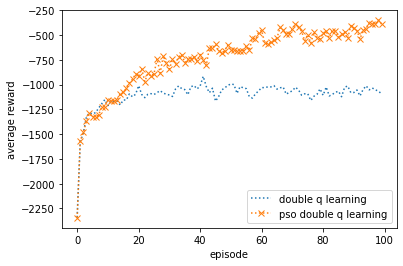

In [ ]:
algorithm_double_q.evaluate_plot_reward_dev(20)
algorithm_double_q1.evaluate_plot_reward_dev(20, style='x:')
plt.legend(['double q learning', 'pso double q learning'])
plt.xlabel('episode')
plt.ylabel('average reward')

# 综合效果

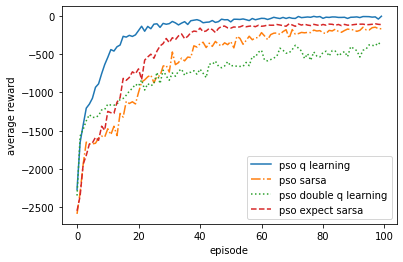

In [ ]:

algorithm_q1.evaluate_plot_reward_dev(20)
algorithm_sarsa1.evaluate_plot_reward_dev(20)
algorithm_double_q1.evaluate_plot_reward_dev(20)
algorithm_sarsa_exp1.evaluate_plot_reward_dev(20)


plt.xlabel('episode')
plt.ylabel('average reward')

plt.legend(['pso q learning','pso sarsa','pso double q learning', 'pso expect sarsa'])

In [ ]:
for i in range(5):
  print(algorithm_q1.reward_array[i*400:(i+1)*400].mean())
print('')
for i in range(5):
  print(algorithm_sarsa1.reward_array[i*400:(i+1)*400].mean())
print('')
for i in range(5):
  print(algorithm_double_q1.reward_array[i*400:(i+1)*400].mean())
print('')
for i in range(5):
  print(algorithm_sarsa_exp1.reward_array[i*400:(i+1)*400].mean())
print('')

NameError: ignored